# Gerekli Kutuphaneleri Importluyoruz

In [16]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import sklearn.preprocessing as preprocessing

# VeriSetimizi Okuyup columnlarini isimlendiriyoruz

In [17]:
df_reel=pd.read_csv("Example-Wine-DataSet.csv",
                   names=['index','target','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od315_of_diluted_wines','proline'])
#VERI SETININ KAYNAGI https://docs.google.com/spreadsheets/d/1-5BGwp7iSikpIYMCVLt9F8soatfVYEHZDS7o0hB-3k4/edit?usp=sharing
df_reel.head(2)

,index,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od315_of_diluted_wines,proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


# Veri Setimizi Read edip Kontrol Ediyoruz

In [18]:
df=df_reel.iloc[:,:]
print(df.head(2))


   index  target  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      0       1    14.23        1.71  2.43               15.6        127   
1      1       1    13.20        1.78  2.14               11.2        100   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   

   color_intensity   hue  od315_of_diluted_wines  proline  
0             5.64  1.04                    3.92     1065  
1             4.38  1.05                    3.40     1050  


# Veri Setimizden Knn algoritmasina hazirlamak icin bos veriler var mi kontrol ediyoruz

In [19]:
df.isnull().values.any()

False

# Yok Harika

In [20]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,178.0,88.500000,51.528309,0.00,44.2500,88.500,132.7500,177.00
target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66


# Ozelliklerimizin Araliklari Birbirini Tutmuyor Standardize Gerekebilir

In [21]:
import random
def PrintAndCheck(Result,df): #Gercek Kategorileri ile tahmin ettigimiz kategorileri karsilastirma ve confusion_matrixi uretme fonksiyonu
    
    #gercek kategorileri cekmek icin gerekli pandas islemleri ve tahmin ettigimiz rowlarin idsi araciliyla verisetimizden cekiyoruz
    Reel_target=df.iloc[[int(x[0]) for x in Result],[1]].values 
    #tahmin ettigimiz kategorileri floatdan inte donusturup scikitlearnden yararlandigimiz fonksiyona veriyoruz 
    Predict_target=[]
    for i in Result:
        #her kategoriye uzakligi esitse random
        if int(i[1][0][1])==int(i[1][1][1]) and int(i[0][1])==int(i[1][2][1]):
            Predict_target.append(i[random.randrange(3)][1])
        
        #ilk iki kategori eleman sayisi esitse random
        elif int(i[1][0][1])==int(i[1][1][1]):
            Predict_target.append(i[random.randrange(2)][1])
        else:
            Predict_target.append(i[1][0][1])
            
    return sm.confusion_matrix(Reel_target, Predict_target)

def KNN(distance,k):# Train setimizdeki her bir row icin uzakligi tespit ettigimiz verileri siralayip hangi kategoriye ait oldugunu tahmin ediyoruz
    
    #kucukten buyuye siraliyoruz ki oklid uzakligina gore en yakin oldugu komsular en ust indexe ciksinlar
    distance.sort(key=lambda x: x[1])
    
    #ilk k komsusunun hanki kategoriye ait olduklarinin frekanslarini buluyoruz
    frequence=[[0,1],[0,2],[0,3]]
    for i,j in distance[:k]:
        if i==1.00:
            frequence[0][0]+=1
        elif i==2.00:
            frequence[1][0]+=1
        else:
            frequence[2][0]+=1
            
    #frekanslari buyukten kucuge siralayip en buyuk indexteki kategoriye atiyoruz
    frequence.sort(key=lambda x:x[0],reverse=True) 
    return frequence
            
def ThreefoldCrossvalidation(df_clear,k,scaled=True):
    
    #standardize islemleri burada tabiki index ve target kolonlari haric
    if scaled:
        names=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins',
               'color_intensity','hue','od315_of_diluted_wines','proline']
        scaler = preprocessing.StandardScaler()
        scaled_df = scaler.fit_transform(df_clear[names])
        df = pd.DataFrame(scaled_df, columns=names)
        df=pd.concat([df_clear[['index','target']], df], axis=1)
    else:
        df=df_clear
        
        
    #Veri setimizi 3 e ayiriyoruz ki 3 katli capraz gecerlilik modeliyle yapalim algoritmamizi
    BigDataFrame=[]
    BigDataFrame.append(df.iloc[lambda x: x.index % 3 == 0])#1. Parca /////////////// a  
    BigDataFrame.append(df.iloc[lambda x: x.index % 3 == 1])#2. Parca ////////////// b
    BigDataFrame.append(df.iloc[lambda x: x.index % 3 == 2])#3. Parca ////////////// test     train=a+b
    i=0
    
    #denedigimiz 3 tane farkli test veriseti icin confisuon martiksimizi hazirliyoruz
    ResultConfisuonMatrix=[[0 for i in range(3)] for i in range(3)]
    
    #dongumuze baslatiyoruz ayirdigimiz datasetleri train ve test diye ayiriyoruz
    while i<3:
        RequiredMerge=[]
        j=0
        
        # bu kisim j. grup haric n-1 grubu train set icin mergelemek icin gerekli dongu
        while j<3: 
            if not j==i:
                RequiredMerge.append(BigDataFrame[j])
            j+=1
        
        #3-1 den gelen 2 parcaya ayirdigimiz train setlerini birlestiriyoruz
        trainset=pd.concat(RequiredMerge).values
        
        #test seti icin target kolonunu siliyoruz
        testset=BigDataFrame[i].iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]].values#test yapacagimiz icin hangi gruba ait olduklarini dahil etmiyoruz
    
        #train setindeki herbir row icin testsetindeki rowlar arasinda oklid distance yapmaya basliyoruz
        ResultOfAllRow=[]
        for testrow in testset:
            result=[]
            for trainrow in trainset:
                #Oklid Uzakligi formulu
                result.append([trainrow[1],np.sqrt(np.sum((testrow[1:]-trainrow[2:]) ** 2, axis=0))])
            
            #tum rowlara buldugumuz uzakliklari hesaplamak icin tahmin etmeye calistigimiz rowun indexiyle train setimizdeki uzaklik sonuclarini ve ona ait train setimizdeki kategori id yi yolluyoruz
            ResultOfAllRow.append([testrow[0],KNN(result[:],k)])#KNN fonksiyonu 
            
        #En son buldugumuz tum rowlarin en yakin k adet rowun kategorisini(ait oldugu sinifiiyla confissuon yapmak amaciyla fonksiyona gonderiyoruz)
        ResultConfisuonMatrix+=PrintAndCheck(ResultOfAllRow,df)#PrintAndCheck fonksiyonu
        i+=1
        
    #Confisuon matrixin ortalamasini aliyoruz
    ResultConfisuonMatrix=ResultConfisuonMatrix/3
    
    #Accuary Error rate vb. performans olcumlerini Ekrana K degeriyle yazdiriyoruz
    truerate=(ResultConfisuonMatrix[0][0]+ResultConfisuonMatrix[1][1]+ResultConfisuonMatrix[2][2]+ResultConfisuonMatrix[1][2]+ResultConfisuonMatrix[2][1])/( np.sum(ResultConfisuonMatrix))
    errorrate=1-truerate
    sensitivity=ResultConfisuonMatrix[0][0]/(ResultConfisuonMatrix[1][0]+ResultConfisuonMatrix[2][0]+ResultConfisuonMatrix[0][0])
    specificity=(ResultConfisuonMatrix[1][1]+ResultConfisuonMatrix[1][2]+ResultConfisuonMatrix[2][1]+ResultConfisuonMatrix[2][2])/(ResultConfisuonMatrix[1][1]+ResultConfisuonMatrix[1][2]+ResultConfisuonMatrix[2][1]+ResultConfisuonMatrix[2][2]+(ResultConfisuonMatrix[1][1]+ResultConfisuonMatrix[1][2]+ResultConfisuonMatrix[2][1]+ResultConfisuonMatrix[0][1]+(ResultConfisuonMatrix[1][1]+ResultConfisuonMatrix[1][2]+ResultConfisuonMatrix[2][1]+ResultConfisuonMatrix[0][2])))
    
    #Metriclerin bulumunda kullandigim formul kaynagin fotografi en altta
       
    print("K={}\nAccuary Rate: {}\nError Rate: {}\nSensitivity:{}\nSpecificity:{}".format(k,truerate,errorrate,sensitivity,specificity))
    return [k,truerate,errorrate,sensitivity,specificity]

3 katli capraz gecerlilik uygulayacagiz

In [43]:
k_limit=50
mainresult=np.zeros(shape=(k_limit-1,5))

#K iterayonuna basliyoruz
for i in range(1,k_limit):
    mainresult[i-1]=ThreefoldCrossvalidation(df,i,False)
    

K=1
Accuary Rate: 0.9044943820224719
Error Rate: 0.0955056179775281
Sensitivity:0.8620689655172413
Specificity:0.3827586206896552
K=2
Accuary Rate: 0.9044943820224718
Error Rate: 0.09550561797752821
Sensitivity:0.8088235294117647
Specificity:0.35333333333333333
K=3
Accuary Rate: 0.8820224719101124
Error Rate: 0.1179775280898876
Sensitivity:0.7794117647058824
Specificity:0.3795620437956205
K=4
Accuary Rate: 0.9157303370786517
Error Rate: 0.0842696629213483
Sensitivity:0.8333333333333333
Specificity:0.3724137931034483
K=5
Accuary Rate: 0.9325842696629215
Error Rate: 0.06741573033707848
Sensitivity:0.8615384615384616
Specificity:0.38596491228070173
K=6
Accuary Rate: 0.9213483146067416
Error Rate: 0.0786516853932584
Sensitivity:0.835820895522388
Specificity:0.381625441696113
K=7
Accuary Rate: 0.9213483146067416
Error Rate: 0.0786516853932584
Sensitivity:0.835820895522388
Specificity:0.4044943820224719
K=8
Accuary Rate: 0.9044943820224719
Error Rate: 0.0955056179775281
Sensitivity:0.8181818

# Hangi K bu veri seti icin uygunlugunu kontrol etmek icin Ekrana cizdiriyoruz

Text(0, 0.5, 'Hata Orani')

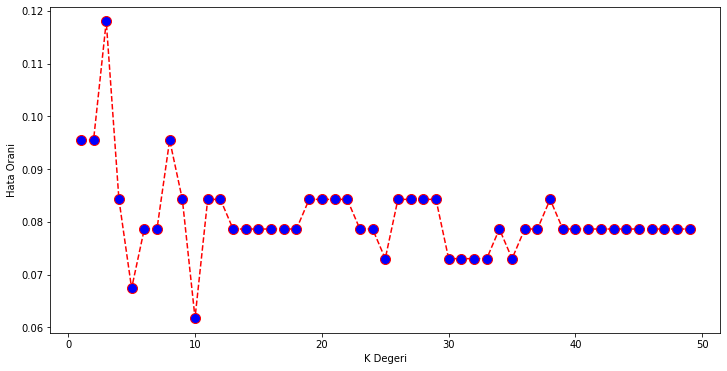

In [44]:
#her k icin hata oranlarini cizdiriyoruz
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, k_limit), mainresult[:,[2]], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10);
plt.xlabel('K Degeri')
plt.ylabel('Hata Orani')

# Simdi Hazir Fonksiyon Ile KNN Algoritmamizi uygulayalim

In [45]:
# gerekli kutuphanelerimizi importladik

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [46]:
# test setimiz icin gercek kategorileri cikardik
df_II=df_reel.values
X=df_II[:,2:]
Y=df_II[:,1]

In [47]:
# %75 train %25 test setimizi cikardik
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.1, random_state=2, shuffle=True)

In [48]:
#K iterayonuna basliyoruz
mainresult=np.zeros(shape=(k_limit-1,2))
for i in range(1,k_limit):
    knn=KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X,Y)
    #tahminleri kontrol ediyoruz
    y_pred = knn.predict(X_train)
    # yazdirmak icin sakliyoruz
    mainresult[i-1]=[i,1-merain, y_pred)]

Text(0, 0.5, 'Hata Orani')

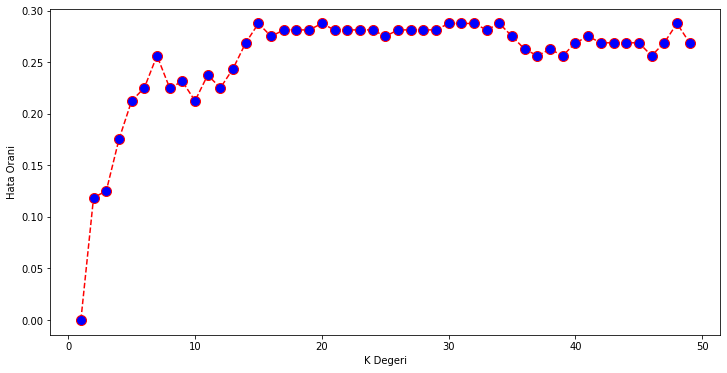

In [49]:
#her k icin hata oranlarini cizdiriyoruz
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, k_limit), mainresult[:,[1]], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10);
plt.xlabel('K Degeri')
plt.ylabel('Hata Orani')

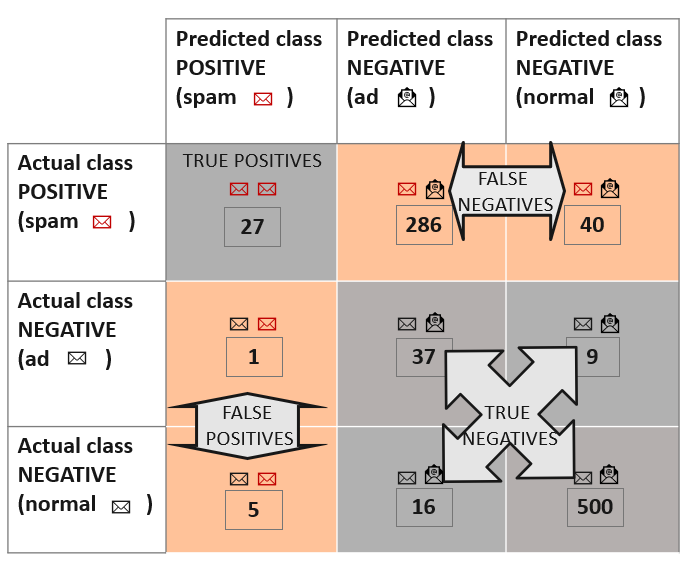
